# One-layer Neural Network

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## function for variables

In [2]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

## function for model construction

In [3]:
def model(X, w_h, w_o):
    h = tf.nn.sigmoid(tf.matmul(X, w_h))
    return tf.matmul(h, w_o)

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
X_trn, Y_trn, X_test, Y_test = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## make placeholder for inputs and labels

In [5]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.int32, [None]) 
# sparse_softmax_cross_entropy_with_logits 이용시 int32

## weight variable 와 Model 만들기
### 첫번째 hidden layer은 input을 784 / 2 = 392 차원으로 보낸다.
### output layer에서는 이를 label의 차원인 10차원으로 보낸다.

In [6]:
hidden_dim = 392
w_h = init_weights([784, hidden_dim])
w_o = init_weights([hidden_dim, 10])
py_x = model(X, w_h, w_o)

## loss function
### tf.nn.sparse_softmax_cross_entropy_with_logits: model output에 softmax계산을 내부적으로 해주고, 이에 대하여 숫자로된 label(one hot coding이 아닌)에 대해서 cross entropy를 계산한다.
### tf.nn.softmax_cross_entropy_with_logits은 multilabel한 경우에 적용 가능한 경우
### ex) 사진의 class를 구분할 때, 개와 고양이가 사진에 동시에 있을 경우

In [7]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(py_x, Y))

## Training operator
### GradientDescent 말고도 여러가지 optimizer를 사용할 수 있다.
#### tf.train.AdadeltaOptimizer
#### tf.train.AdadeltaOptimizer
#### tf.train.AdagradOptimizer
#### tf.train.MomentumOptimizer
#### tf.train.AdamOptimizer
#### tf.train.FtrlOptimizer
#### tf.train.RMSPropOptimize

In [8]:
train_op = tf.train.AdagradOptimizer(learning_rate=0.05).minimize(loss)

## Accuracy 계산
### tensorflow를 통해서 accuracy를 계산
### tf.nn.in_top_k(x, y, k)는 prediction x의 상위 k개의 결과가 true label y를 포함하는지를 계산 
### 이에 대한 output은 boolean 으로 나오므로, 이를 0, 1로 바꿔주기 위해서 tf.cast를 이용하여 float32로 변환한 이후에 accuract를 계산한다.

In [9]:
correct = tf.nn.in_top_k(py_x, Y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

## Session initialize 및 training

In [10]:
trn_loss_list = list()
test_loss_list = list()
test_accuracy_list = list()
batch_size = 128
with tf.Session() as sess:    
    tf.initialize_all_variables().run()
    
    for i in range(100):
        trn_loss = 0
        for start, end in zip(range(0, len(X_trn), batch_size), range(batch_size, len(X_trn)+1, batch_size)):
            tmp_loss, _ = sess.run([loss, train_op], feed_dict={X: X_trn[start:end], Y: Y_trn[start:end]})
            trn_loss += tmp_loss
        trn_loss_list.append(trn_loss / 100)
        test_loss, test_acc = sess.run([loss, accuracy], feed_dict={X: X_test, Y: Y_test})
        test_loss_list.append(test_loss)
        test_accuracy_list.append(test_acc)
        print("epoch: {} test accuracy {:0.4f}".format(i, test_acc))

epoch: 0 test accuracy 0.8430
epoch: 1 test accuracy 0.8872
epoch: 2 test accuracy 0.9001
epoch: 3 test accuracy 0.9058
epoch: 4 test accuracy 0.9107
epoch: 5 test accuracy 0.9144
epoch: 6 test accuracy 0.9168
epoch: 7 test accuracy 0.9190
epoch: 8 test accuracy 0.9213
epoch: 9 test accuracy 0.9235
epoch: 10 test accuracy 0.9250
epoch: 11 test accuracy 0.9265
epoch: 12 test accuracy 0.9282
epoch: 13 test accuracy 0.9302
epoch: 14 test accuracy 0.9320
epoch: 15 test accuracy 0.9344
epoch: 16 test accuracy 0.9364
epoch: 17 test accuracy 0.9380
epoch: 18 test accuracy 0.9390
epoch: 19 test accuracy 0.9410
epoch: 20 test accuracy 0.9421
epoch: 21 test accuracy 0.9431
epoch: 22 test accuracy 0.9445
epoch: 23 test accuracy 0.9457
epoch: 24 test accuracy 0.9467
epoch: 25 test accuracy 0.9475
epoch: 26 test accuracy 0.9488
epoch: 27 test accuracy 0.9498
epoch: 28 test accuracy 0.9506
epoch: 29 test accuracy 0.9516
epoch: 30 test accuracy 0.9523
epoch: 31 test accuracy 0.9530
epoch: 32 test acc

## Loss plot

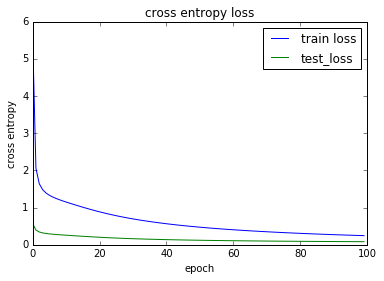

In [11]:
x = np.arange(100)
plt.plot(x, trn_loss_list)
plt.plot(x, test_loss_list)
plt.title("cross entropy loss")
plt.legend(["train loss", "test_loss"])
plt.xlabel("epoch")
plt.ylabel("cross entropy")

## Accuracy plot

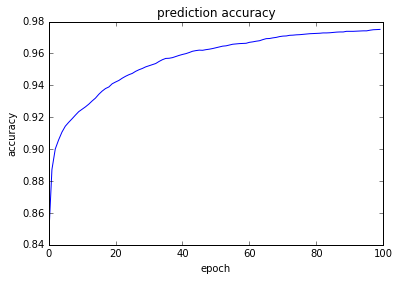

In [12]:
x = np.arange(100)
plt.plot(x, test_accuracy_list)
plt.title("prediction accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")